In [33]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

In [63]:
df= pd.read_csv("delivery_time.csv")

In [64]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [65]:
df.shape

(21, 2)

In [37]:
delivery_time.size

42

In [66]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [67]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


array([[<AxesSubplot:title={'center':'Delivery Time'}>,
        <AxesSubplot:title={'center':'Sorting Time'}>]], dtype=object)

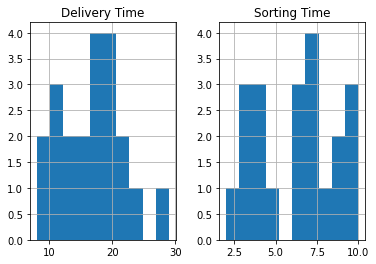

In [68]:
df.hist()

In [41]:
import seaborn as sns

C:\Users\Vanshika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

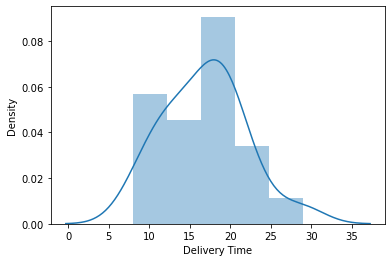

In [69]:
sns.distplot(df['Delivery Time'])

C:\Users\Vanshika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

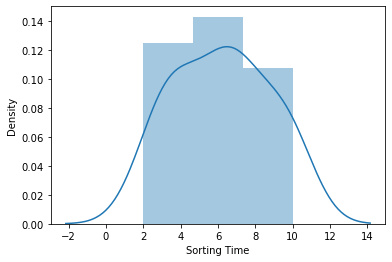

In [70]:
sns.distplot(df['Sorting Time'])

In [44]:
#ols ordinary least square

In [71]:
df.rename(columns={'Sorting Time':'sorting_time','Delivery Time':'delivery_time'},inplace=True)

In [72]:
df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [73]:
model = smf.ols("delivery_time ~ sorting_time ",data= df).fit()

In [74]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

<AxesSubplot:xlabel='delivery_time', ylabel='sorting_time'>

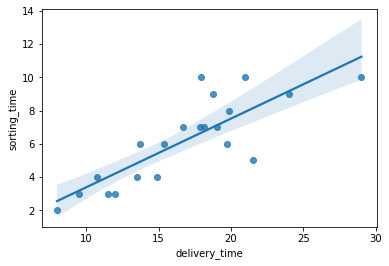

In [75]:
sns.regplot(x = "delivery_time",y = "sorting_time",data = df)

In [76]:
# we have to predict delivery time by using sorting time

In [77]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

##  delivery_time = 6.58 + 1.64*sorting_time

In [78]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 26 Aug 2022   Prob (F-statistic):           3.98e-06
Time:                        21:31:10   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
model.conf_int(0.05)

,0,1
Intercept,2.979134,10.186334
sorting_time,1.108673,2.189367


# # #PREDICT FOR NEW DATA POINT

In [82]:
nd = pd.Series([200,300])

In [83]:
df1 = pd.DataFrame(nd,columns=['sorting_time'])

In [84]:
model.predict(df1)

0    336.386713
1    501.288703
dtype: float64

## 2nd METHOD

In [86]:
x = df['sorting_time']
y= df['delivery_time']

In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.95,random_state=100)

In [88]:
import statsmodels.api as sm

In [90]:
x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train,x_train_sm).fit()

C:\Users\Vanshika\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [91]:
lr.params

const           6.246094
sorting_time    1.662067
dtype: float64

In [94]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:          delivery_time   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     44.65
Date:                Fri, 26 Aug 2022   Prob (F-statistic):           3.86e-06
Time:                        21:42:07   Log-Likelihood:                -44.013
No. Observations:                  19   AIC:                             92.03
Df Residuals:                      17   BIC:                             93.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.2461      1.717      3.638   

C:\Users\Vanshika\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
